In [1]:
# Itamar Fradkin - 312531064
# Ron Boxer - 321219008

First you will need to create `data` folder.

**Download the data**


1. we parsed the data and created df with 20k papers.\
   Download the `metadata.csv` and `covid_20k_df.csv` from [here](https://drive.google.com/drive/folders/1iij-AgINu--a49WIypLTzbYqqJZOh46k?usp=sharing) and place them in the `data` folder


Then run the `load_metadata()` function. 


#### Dataset Description

In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 1,000,000 scholarly articles, including over 350,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.

In [2]:
DATASET_PATH = 'data/'
METADATA_PATH = 'data/metadata.csv'

As we only need some of the data, we load a small cohort into a df and cleaning it.<br> We created `utilits` which can be found in `utils` folder.

let`s load and take a look on the metadata.

In [3]:
import utils.dataset as ut
df = ut.load_metadata()
df.head(5)

C:\Users\ronbo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
sha,,,,,,,,,,,,,,,,,,
e4494dc889fcaadde2f5c0fcf401e7e8a3d96a63,6ltgimq0,Elsevier; Medline; PMC; WHO,Electrochemical immunosensor for rapid and hig...,10.1016/j.talanta.2022.123211,PMC8730781,3.49993e+07,no-cc,A label-free electrochemical biosensing approa...,2022-04-01,"Mehmandoust, Mohammad; Gumus, Z. Pinar; Soylak...",Talanta,NaN,NaN,NaN,document_parses/pdf_json/e4494dc889fcaadde2f5c...,document_parses/pmc_json/PMC8730781.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34999319/;...,245704928.0
12bc48af0b3196eef7e887807130b8553e8d7190,vmsyu6w7,Elsevier; Medline; PMC; WHO,Entrepreneurial Interventions for crisis manag...,10.1016/j.ijdrr.2022.102830,PMC8865137,3.5229e+07,no-cc,This article investigates both the negative an...,2022-04-01,"Krishnan, Commander S. Navaneetha; Ganesh, L.S...",Int J Disaster Risk Reduct,NaN,NaN,NaN,document_parses/pdf_json/12bc48af0b3196eef7e88...,document_parses/pmc_json/PMC8865137.xml.json,https://doi.org/10.1016/j.ijdrr.2022.102830; h...,246523637.0
fea63a0a7eb45059214491c2cb894f7a98b5f65c,tx49s7f8,Medline; PMC; WHO,A Qualitative Examination of COVID-19’s Impact...,10.1177/08901171211053845,PMC8851044,3.4787e+07,no-cc,PURPOSE: The COVID-19 pandemic is correlated w...,2022-03-31,"Brannon, Grace Ellen; Mitchell, Sophia; Ray, M...",Am J Health Promot,NaN,NaN,NaN,document_parses/pdf_json/fea63a0a7eb4505921449...,NaN,https://doi.org/10.1177/08901171211053845; htt...,244385128.0
631cf2b3762bf36ecfe686765b08cbc34351fbd9,aagrsfeh,Elsevier; PMC; WHO,Population Mobility and Socioeconomic Indicato...,10.1016/j.ijid.2021.12.061,PMC8884814,NaN,els-covid,Purpose To explore the extent that socioeconom...,2022-03-31,"Marwah, A.; Feldman, J.; Moineddin, R.; Thomas...",International Journal of Infectious Diseases,NaN,NaN,NaN,document_parses/pdf_json/631cf2b3762bf36ecfe68...,NaN,https://api.elsevier.com/content/article/pii/S...,247159475.0
f43c98c2f9caab16b09f158d537e77a2d0949e53,zemvldcl,Elsevier; WHO,Fear of being near: Fear supersedes sociabilit...,10.1016/j.paid.2021.111404,NaN,NaN,els-covid,"In the COVID-19 era, physical interactions ubi...",2022-03-31,"Amram, Ran; Ravreby, Inbal; Trainin, Nitzan; Y...",Personality and Individual Differences,NaN,NaN,NaN,document_parses/pdf_json/f43c98c2f9caab16b09f1...,NaN,https://doi.org/10.1016/j.paid.2021.111404; ht...,244540686.0


##### Part 1 – comparison model training 

We chose our comparison model traing to be - **Doc2vec** <br>
Doc2vec is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. [ Distributed Representations of Sentences and Documents](https://arxiv.org/abs/1405.4053) . The algorithm is an adaptation of word2vec which can generate vectors for words.

The vectors generated by doc2vec can be used for tasks like finding similarity between sentences/paragraphs/documents.

Unlike sequence models like RNN, where word sequence is captured in generated sentence vectors, doc2vec sentence vectors are word order independent.

For sentence similarity tasks, doc2vec vectors may perform reasonably well.

For this task we chose to focus on the abstract data of each paper.

#### Train doc2vec on the abstract data.

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronbo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(str(_d).lower()), tags=[str(i)]) for i, _d in enumerate(df['abstract'])]

In [7]:
# Train Model or Load a trained one.
try:
    model = Doc2Vec.load("d2v.model")
except:
    # Initializing doc2vec
    model = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=2, epochs=80)
    
    # Building the vocabulary of tagged data
    model.build_vocab(tagged_data)
    
    # Training Doc2Vec
    model.train(tagged_data, total_examples=model.corpus_count, epochs=80)
    
    # Save the model
    model.save("d2v.model")

##### Cosine similarity

$$ CosineSimilarity = \cos(\theta) = \tfrac{A \cdot B}{ \| A\|  \cdot \| B\| }$$

The `Cosine similarity` is a number between 0 and 1. the higher the similar 2 papers will be.

`Cosine similarity` measures the cosine of the angle between two vectors projected in a multi-dimensional space. <br>
In our context, the two vectors representing the word counts of two document's `abstract`. <br>
Therefore, we can assume that better cosine similarity score we get the similar the papers will be.

Now let's create a function that calculates the similarity between 2 papers. <br>
`Doc2vec` generated vectors for the `abstract` data of each paper in our data set, therefore we chose our evaluation method to be the  `Cosine similarity`.

In [8]:
def paper_similarity(paper_id: int) -> (int, float):
    """
    This function will calculate the most similar paper to the given paper.
    calculated with cosine similarity[0,1]
    1- Very similar.
    0- Not similar at all.
    :param paper_id: id of the paper.
    :return: (paper_id(int), cosine similarity(float).
    """
    similar_doc = model.dv.most_similar(str(paper_id))
    return similar_doc[0]

In [9]:
paper_id = 21
paper_similarity(21)

('12690', 0.8488423824310303)

##### Part 2 – comparison model analysis and evaluation

we chose our evaluation method to be the  `Cosine similarity`. <br> 
Now, lets dive in into the text itself and check if our evaluation method performed good.<br>
First, we will print the the **original paper title** and the **Top 10** most similar papers according to the `cosine similarity`

In [10]:
paper_id = 21
most_similar = 10
similar_doc = model.dv.most_similar(str(paper_id))
similar_doc_str_abstract=[]

print('\033[1m ORIGINAL PAPER: \033[0m', df.iloc[paper_id]['title'])
print('\033[1m Top 10 most similar paper`s Titles-  \033[0m')
print('-'*100)
for i in range(most_similar):
    index = int(similar_doc[i][0])    
    print('\033[1m  Title- \033[0m',df.iloc[index]['title'])
    print('\033[1m  Cosine similarity score- \033[0m', similar_doc[i][1])
    print('-'*100)
    similar_doc_str_abstract.append(df.iloc[index]['abstract'])

 ORIGINAL PAPER:  SARS-CoV-2 Breakthrough Infections after introduction of 4 COVID-19 Vaccines, South Korea, 2021
 Top 10 most similar paper`s Titles-  
----------------------------------------------------------------------------------------------------
  Title-  Risk reduction of severe outcomes in vaccinated COVID-19 cases: an analysis of surveillance data from Estonia, Ireland, Luxembourg and Slovakia, January to November 2021
  Cosine similarity score-  0.8488423824310303
----------------------------------------------------------------------------------------------------
  Title-  Efficacy and Effectiveness of SARS-CoV-2 Vaccines: A Systematic Review and Meta-Analysis
  Cosine similarity score-  0.8303354978561401
----------------------------------------------------------------------------------------------------
  Title-  Serological surveillance of healthcare workers to evaluate natural infection- and vaccine-derived immunity to SARS-CoV-2 during an outbreak in Dili, Timor-Leste


Our original paper is:  **"SARS-CoV-2 Breakthrough Infections after introduction of 4 COVID-19 Vaccines"**. we can understand that the papers will cover the effects of COVID-19 Vaccines. <br>
We can see clearly that the top 10 papers actually also covering the effects of COVID-19 Vaccines.

Ok, now let's add some visualization with [WordCloud](https://github.com/amueller/word_cloud). <br>
Here we will count the most frequented words in the **abstracts** of the Top 10 most similar papers. 

In [11]:
# pip install wordcloud

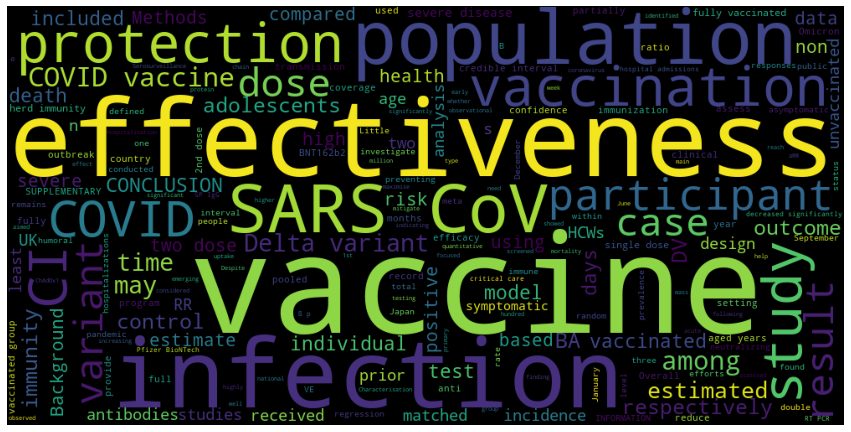

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(similar_doc_str_abstract)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

from this visualization we can see that the most frequented words are -<b> 'vaccine', 'effectiveness', 'infection' ...</b><br>
These results are consistent with the analysis we made earlier. <br>

both of our analysis indicates that the evaluation method we chose (`Cosine similarity`) perform very good, and we can use it to get very similar papers.

Another analysis that we want to make is **Clustering** using **KMeans**. <br>
the intuition using clustering is  to show that all the articles we found using distances(cosine similarity) that are similar will also will share the same cluster.
first lets find the optimal number of clusters using the **elbow method**

In [13]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# run kmeans with many k
distortions = []
K = range(2, 17)

data = model.dv.get_normed_vectors()
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(data)
    k_means.fit(data)
    distortions.append(sum(np.min(cdist(data, k_means.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

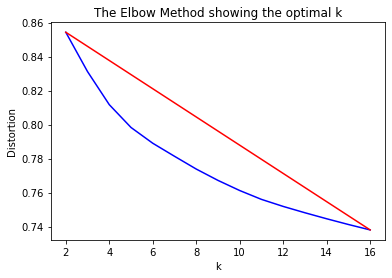

In [14]:
# Plot the elbow
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


#####   optimal K= 5 , Now lets plot the clusters into Graph.

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
#predict the labels of clusters.
label = kmeans.fit_predict(data)

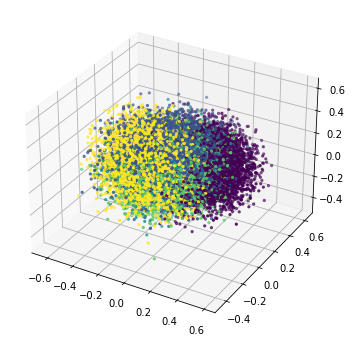

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, figsize=(25, 6))
ax = plt.axes(projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='.', c = label)

As we can see most of the clusters well dispersed. Now lets make the same anlalysis we performed earliar but on the **Centroid centers**, take the top 10 papers near those centers and print them. <br>
We will choose **2 diffrent clusters** and see if there any clear differance between the topic's of those papers. 

######  Cluster number 2

In [17]:
# k_means.cluster_centers_[0]
k_means = KMeans(n_clusters=5, random_state=42).fit(data)
k_means.fit(data)

cluster = 2
most_similar = 10
similar_doc = model.dv.most_similar(k_means.cluster_centers_[cluster])
similar_doc_str = []

for i in range(most_similar):
    index = int(similar_doc[i][0])
    print('-'*100)
    print(df.iloc[index]['title'])
    similar_doc_str.append(df.iloc[index]['title'])

----------------------------------------------------------------------------------------------------
Three separate spike antigen exposures by COVID-19 vaccination or SARS-CoV-2 infection elicit strong humoral immune responses in healthcare workers
----------------------------------------------------------------------------------------------------
SARS-CoV-2 Breakthrough Infections after introduction of 4 COVID-19 Vaccines, South Korea, 2021
----------------------------------------------------------------------------------------------------
Investigating vaccine-induced immunity and its effect in mitigating SARS-CoV-2 epidemics in China
----------------------------------------------------------------------------------------------------
Vaccine effectiveness and duration of protection against symptomatic and severe Covid-19 during the first year of vaccination in France
----------------------------------------------------------------------------------------------------
Serological surve

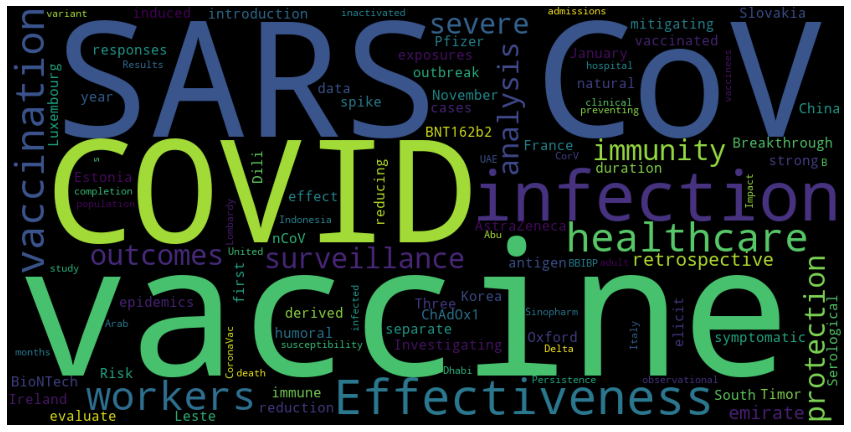

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(similar_doc_str)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

We can see that cluster number 2 is similar to the one we saw earlier and those papers are covering the effectivnesee of COVID 19 vaccine.

######  Cluster number 3

In [19]:
k_means = KMeans(n_clusters=5, random_state=42).fit(data)
k_means.fit(data)

cluster = 3
most_similar = 10
similar_doc = model.dv.most_similar(k_means.cluster_centers_[cluster])
similar_doc_str = []

for i in range(most_similar):
    index = int(similar_doc[i][0])
    print('-'*100)
    print(df.iloc[index]['title'])
    similar_doc_str.append(df.iloc[index]['title'])

----------------------------------------------------------------------------------------------------
Knowledge Discovery on Cryptocurrency Exchange Rate Prediction Using Machine Learning Pipelines
----------------------------------------------------------------------------------------------------
Generating Synthetic Mobility Networks with Generative Adversarial Networks
----------------------------------------------------------------------------------------------------
Multiple lump and rogue wave for time fractional resonant nonlinear Schrödinger equation under parabolic law with weak nonlocal nonlinearity
----------------------------------------------------------------------------------------------------
Modifying Hata-Davidson Propagation Model for Remote Sensing in Complex Environments Using a Multifactional Drone
----------------------------------------------------------------------------------------------------
Spatio-temporal convolutional residual network for regional commerci

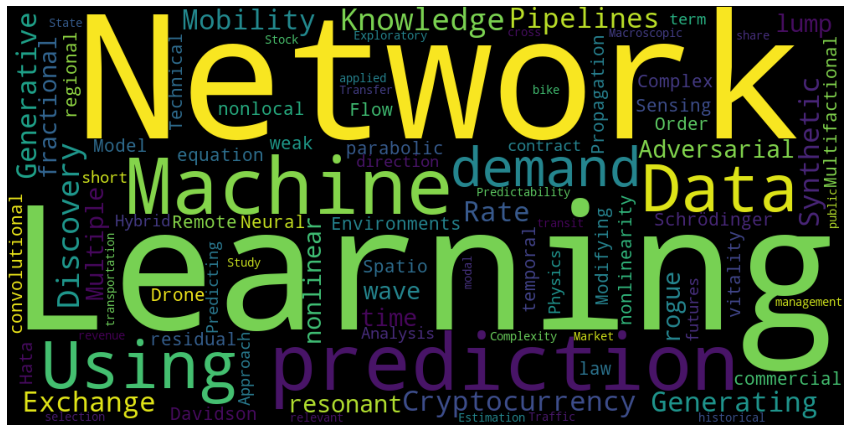

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(similar_doc_str)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

cluster number 3 is covering the subject of **Machine learning** and the use of **convolutional networks**. this subject very different from cluster number 2.

from this visualization we can see that the most frequented words are - 'vaccine', 'effectiveness', 'infection' ...<br>
These results are consistent with the analysis we made earlier. <br>

both of our analysis indicates that the evaluation method we chose (`Cosine similarity`) perform very good, and we can use it to get very similar papers.

#### Summery  

Our main purpose on this work was to find comparison capability between academic papers. The comparison
capability based on `Word embeddings`. Specific we chose to work with `Doc2Vec`. Finally, this model should have the ability to get as input two documents (Covid19 papers in our
case) and return a similarity measure between the two.<br>
Our data set was the `abstract` of each one of the papers. First we turn each paper abstract into vectors using  `Doc2vec` which  generates vectors, at this point we chose our evaluation method to be the `Cosine similarity`. this evaluation method allows us to find similarity between papers as shown above.
<br>
As the results above indicates `doc2vec` successfully finds similarity between papers and even can be used to find groups of papers in some sub-subjects using `k-means`. such as `vaccine affection` or `Machine learning` sub subjects in the cohort of covid-19. <br>
These techniques can be expanded and get better results with adding more data, such as embedding on the papers`s body text or combining
  the method of Compression as we saw in the previous work.

##### Part 3